<p style="text-align:center;">
<img src="https://asset.brandfetch.io/idqsM1syE_/id47XzqOua.svg"
     style="float: center; margin-right: 10px;" />
</p>

<h1><b>Exploratory Data Analysis of "The Movie database"</b></h1>

<h2>Getting basic level insights from the database</h2>

<h3>Objectives:</h3>  

1. Loading the data and applying routine checks
2. Keypoints to be drawn from data  
3. Visualisations to support findings  
4. Deeper analysis on 2 movies  

In [428]:
import numpy as np # Maths help
import seaborn as sns # Visualisation help
import matplotlib.pyplot as plt # Visualisation help
import pandas as pd # Dataframes & Data analysis help
import missingno as msno # Null handling
import os # Operating System functionalities

In [429]:
os.getcwd() # Getting the current directory

'/Users/v/Desktop/Digital Features/Python'

<h3>1. Loading the data and applying routine checks</h3>

In [430]:
pd.set_option('display.max_columns', 25) # Setting an option to see all the existing and to-be-existed-if-needed columns
df = pd.read_csv('/Users/v/Desktop/Digital Features/Python/TMDB_movies.csv') # Retrieving the csv file
df.head() # Checking the dataset in summary

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [431]:
df.info() # Getting the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [432]:
# Creating a function to make a list from a json field (This function was created by VEG3.ai)
def concatenate_json(desired_string):
    # Splitting the full string by '}, {'
    string_list = desired_string.split('}, {')
    # Initializing an empty list to hold the clean genre names
    output_list = []
    
    # Iterating through the list
    for g in string_list:
        # Further splitting by '"name": "' to get the genre name
        name_split = g.split('"name": "')
        if len(name_split) == 2:  # Checking if split was successful
            # The second element is where the name is found
            string_name = name_split[1].split('"')[0]  # Splitting by '"' and grabbing just the name
            output_list.append(string_name)
    
    return output_list

# Using the function on the genres column
df['genres_list'] = df['genres'].apply(concatenate_genres) # (ref: Stack Overflow)
df.drop(columns = ['genres'], inplace=True) # Removing the original column

In [433]:
# Using the function on the keywords column
df['keywords_list'] = df['keywords'].apply(concatenate_genres)
df.drop(columns = ['keywords'], inplace=True)

In [434]:
# Dropping the columns that are not going to be included in this analysis
df.drop(columns = ['homepage'], inplace=True)
df.drop(columns = ['production_companies'], inplace=True)
df.drop(columns = ['production_countries'], inplace=True)

<Axes: >

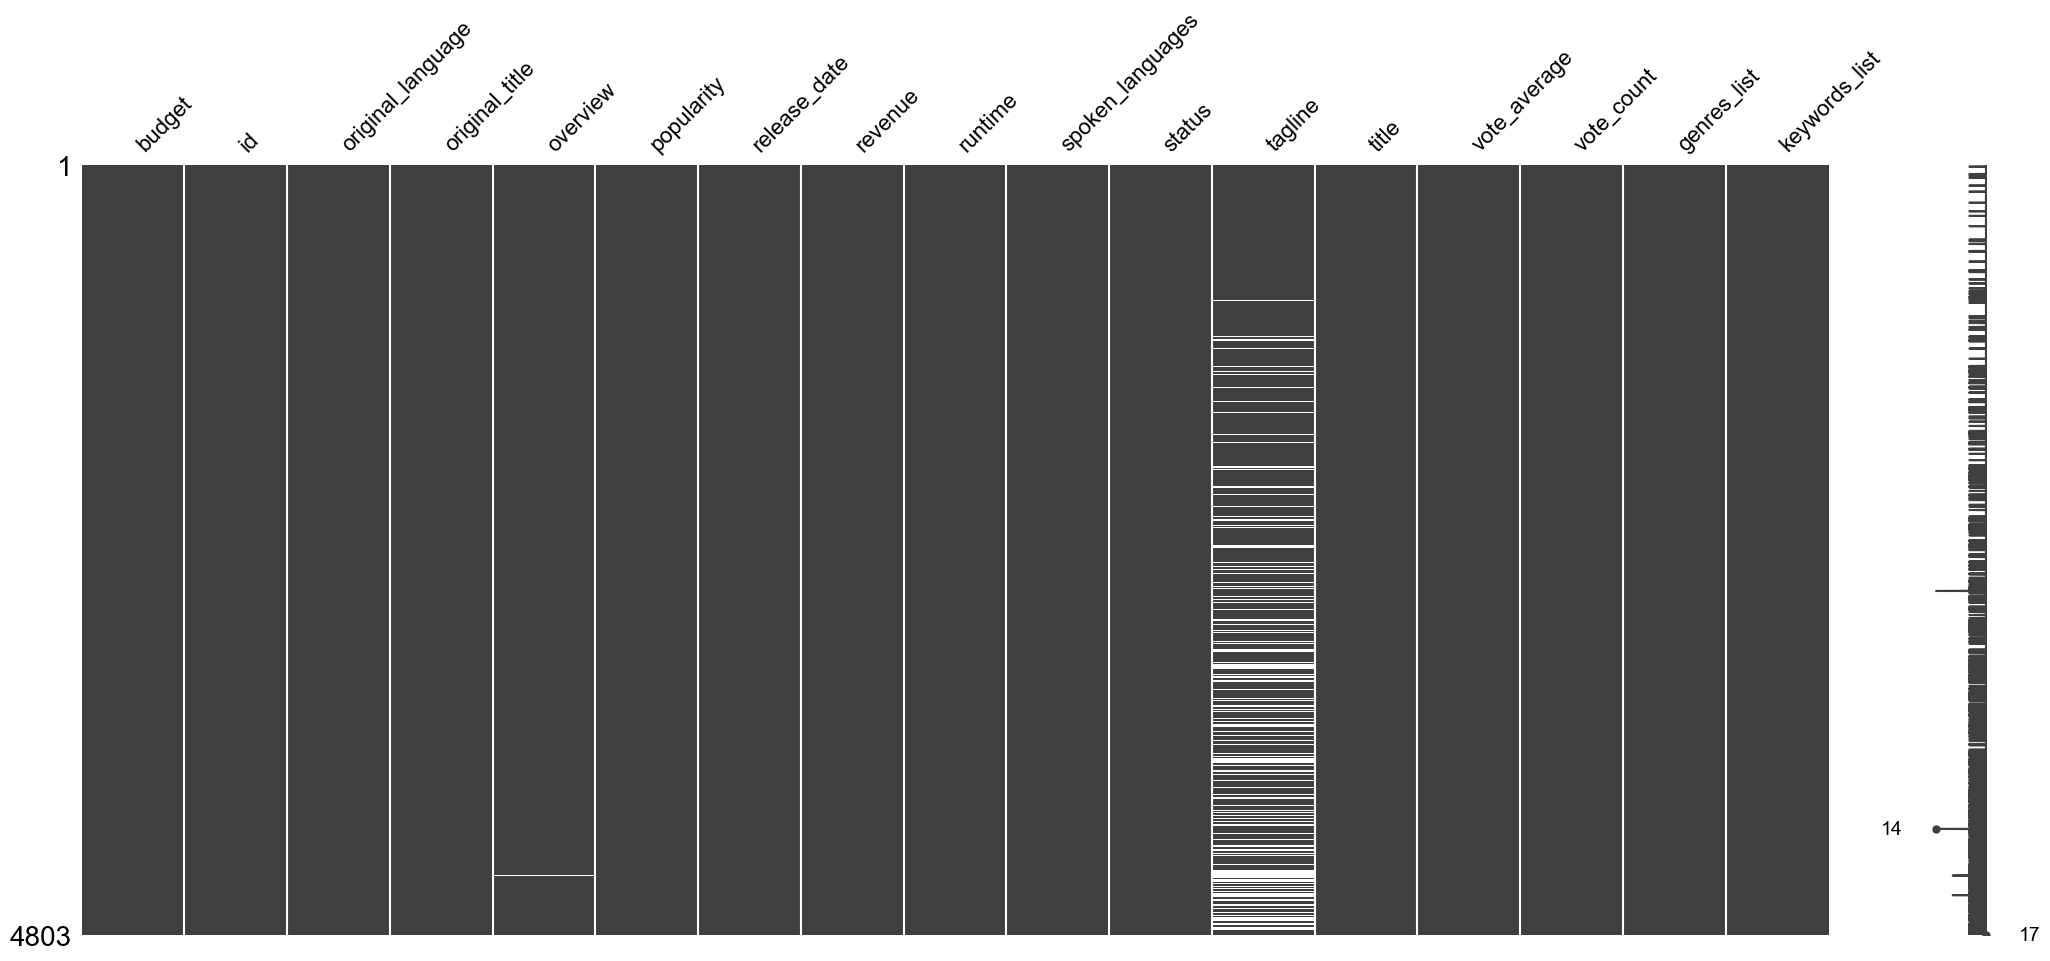

In [435]:
msno.matrix(df) # Checking the null values

In [436]:
# Dropping more columns that will not be worked with due to their null occurances
df.drop(columns = ['tagline'], inplace=True)

In [437]:
df.info() # Checking the final version of dataframe to start analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   id                 4803 non-null   int64  
 2   original_language  4803 non-null   object 
 3   original_title     4803 non-null   object 
 4   overview           4800 non-null   object 
 5   popularity         4803 non-null   float64
 6   release_date       4802 non-null   object 
 7   revenue            4803 non-null   int64  
 8   runtime            4801 non-null   float64
 9   spoken_languages   4803 non-null   object 
 10  status             4803 non-null   object 
 11  title              4803 non-null   object 
 12  vote_average       4803 non-null   float64
 13  vote_count         4803 non-null   int64  
 14  genres_list        4803 non-null   object 
 15  keywords_list      4803 non-null   object 
dtypes: float64(3), int64(4),

In [438]:
df.head() # Checking the dataset in summary

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_list,keywords_list
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,300000000,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi..."
3,250000000,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i..."
4,260000000,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel..."


<h3>2. Keypoints to be drawn from data</h3>

<h4>Which are the most popular movies? How does their budgets and revenues look like?</h4>

In [439]:
# Creating a sub-dataframe and ordering values by their popularity
popularity = df[['budget', 'original_title', 'popularity', 'revenue', 'title', 'vote_average', 'vote_count', 'genres_list', 'keywords_list']].copy()
top10_popular = popularity.sort_values('popularity', ascending=False).head(10)
top10_popular

,budget,original_title,popularity,revenue,title,vote_average,vote_count,genres_list,keywords_list
546,74000000,Minions,875.581305,1156730962,Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits..."
95,165000000,Interstellar,724.247784,675120017,Interstellar,8.1,10867,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa..."
788,58000000,Deadpool,514.569956,783112979,Deadpool,7.4,10995,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero..."
94,170000000,Guardians of the Galaxy,481.098624,773328629,Guardians of the Galaxy,7.9,9742,"[Action, Science Fiction, Adventure]","[marvel comic, spaceship, space, outer space, ..."
127,150000000,Mad Max: Fury Road,434.278564,378858340,Mad Max: Fury Road,7.2,9427,"[Action, Adventure, Science Fiction, Thriller]","[future, chase, post-apocalyptic, dystopia, au..."
28,150000000,Jurassic World,418.708552,1513528810,Jurassic World,6.5,8662,"[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor..."
199,140000000,Pirates of the Caribbean: The Curse of the Bla...,271.972889,655011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,"[Adventure, Fantasy, Action]","[exotic island, blacksmith, east india trading..."
82,170000000,Dawn of the Planet of the Apes,243.791743,710644566,Dawn of the Planet of the Apes,7.3,4410,"[Science Fiction, Action, Drama, Thriller]","[leader, colony, post-apocalyptic, dystopia, f..."
200,125000000,The Hunger Games: Mockingjay - Part 1,206.227151,752100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,"[Science Fiction, Adventure, Thriller]","[resistance, post-apocalyptic, dystopia, war, ..."
88,165000000,Big Hero 6,203.734590,652105443,Big Hero 6,7.8,6135,"[Adventure, Family, Animation, Action, Comedy]","[brother brother relationship, hero, talent, r..."


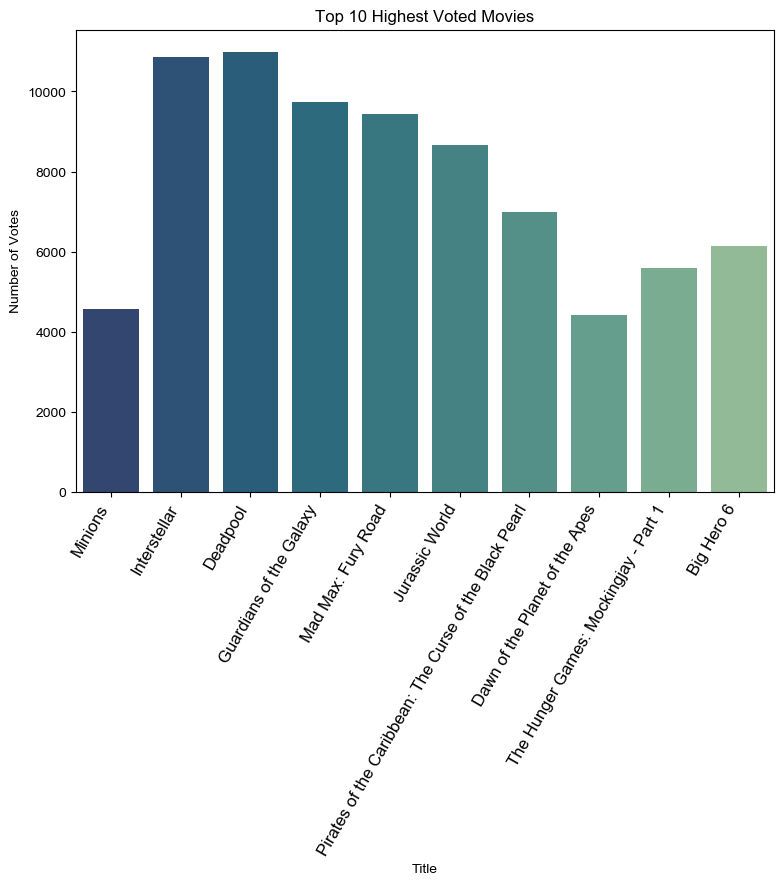

In [440]:
# Creating a bar plot for top 10 movies by the number of votes
plt.figure(figsize=(9, 6))
sns.barplot(top10_popular, 
            x='title', 
            y='vote_count', 
            palette='crest_r')
plt.xticks(rotation=60,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )
# plt.ylim(8, 9)
plt.xlabel('Title')
plt.ylabel('Number of Votes')
plt.title('Top 10 Highest Voted Movies')
plt.show()

<h4>It seems that higher budget or higher revenue is not necessarily effective on popularity. Another point is, the most popular movie is not the highest rated movie. Let's check...</h4>

In [441]:
# Sorting the dataframe by the average vote
popularity.sort_values('vote_average', ascending=False).head(10)  # Ordering values by their popularity

,budget,original_title,popularity,revenue,title,vote_average,vote_count,genres_list,keywords_list
3519,0,Stiff Upper Lips,0.356495,0,Stiff Upper Lips,10.0,1,[Comedy],"[italy, victorian england, young woman]"
4247,1,Me You and Five Bucks,0.094105,0,Me You and Five Bucks,10.0,2,"[Romance, Comedy, Drama]",[]
4045,0,"Dancer, Texas Pop. 81",0.376662,565592,"Dancer, Texas Pop. 81",10.0,1,"[Comedy, Drama, Family]","[small town, texas]"
4662,0,Little Big Top,0.092100,0,Little Big Top,10.0,1,[Comedy],[independent film]
3992,0,Sardaarji,0.296981,0,Sardaarji,9.5,2,[],[]
2386,0,One Man's Hero,0.910529,0,One Man's Hero,9.3,2,"[Western, Action, Drama, History]","[war, army, battlefield, chivalry]"
2970,10500000,There Goes My Baby,0.037073,123509,There Goes My Baby,8.5,2,"[Drama, Comedy]",[]
1881,25000000,The Shawshank Redemption,136.747729,28341469,The Shawshank Redemption,8.5,8205,"[Drama, Crime]","[prison, corruption, police brutality, prison ..."
2796,0,The Prisoner of Zenda,4.021389,0,The Prisoner of Zenda,8.4,11,"[Adventure, Drama, Romance]","[kidnapping, coronation, villain, kingdom, hei..."
3337,6000000,The Godfather,143.659698,245066411,The Godfather,8.4,5893,"[Drama, Crime]","[italy, love at first sight, loss of father, p..."


<h4>Low vote_count is not exactly reliable so we should filter more.</h4>

In [442]:
# Filtering the dataframe to retrieve vote counts higher than 100, then sorting by the average vote
top10_byavgvote = popularity[popularity['vote_count'] >= 100].sort_values('vote_average', ascending=False).head(10)
top10_byavgvote

,budget,original_title,popularity,revenue,title,vote_average,vote_count,genres_list,keywords_list
1881,25000000,The Shawshank Redemption,136.747729,28341469,The Shawshank Redemption,8.5,8205,"[Drama, Crime]","[prison, corruption, police brutality, prison ..."
3337,6000000,The Godfather,143.659698,245066411,The Godfather,8.4,5893,"[Drama, Crime]","[italy, love at first sight, loss of father, p..."
2294,15000000,千と千尋の神隠し,118.968562,274925095,Spirited Away,8.3,3840,"[Fantasy, Adventure, Animation, Family]","[witch, parents kids relationship, magic, twil..."
3232,8000000,Pulp Fiction,121.463076,213928762,Pulp Fiction,8.3,8428,"[Thriller, Crime]","[transporter, brothel, drug dealer, boxer, mas..."
1818,22000000,Schindler's List,104.469351,321365567,Schindler's List,8.3,4329,"[Drama, History, War]","[factory, concentration camp, hero, holocaust,..."
2731,13000000,The Godfather: Part II,105.792936,47542841,The Godfather: Part II,8.3,3338,"[Drama, Crime]","[italo-american, cuba, vororte, melancholy, pr..."
3865,3300000,Whiplash,192.528841,13092000,Whiplash,8.3,4254,[Drama],"[jazz, obsession, conservatory, music teacher,..."
662,63000000,Fight Club,146.757391,100853753,Fight Club,8.3,9413,[Drama],"[support group, dual identity, nihilism, rage ..."
4602,350000,12 Angry Men,59.259204,1000000,12 Angry Men,8.2,2078,[Drama],"[judge, jurors, sultriness, death penalty, fat..."
2247,26500000,もののけ姫,60.732738,159375308,Princess Mononoke,8.2,1983,"[Adventure, Fantasy, Animation]","[fight, wolf, village and town, iron, pan, wil..."


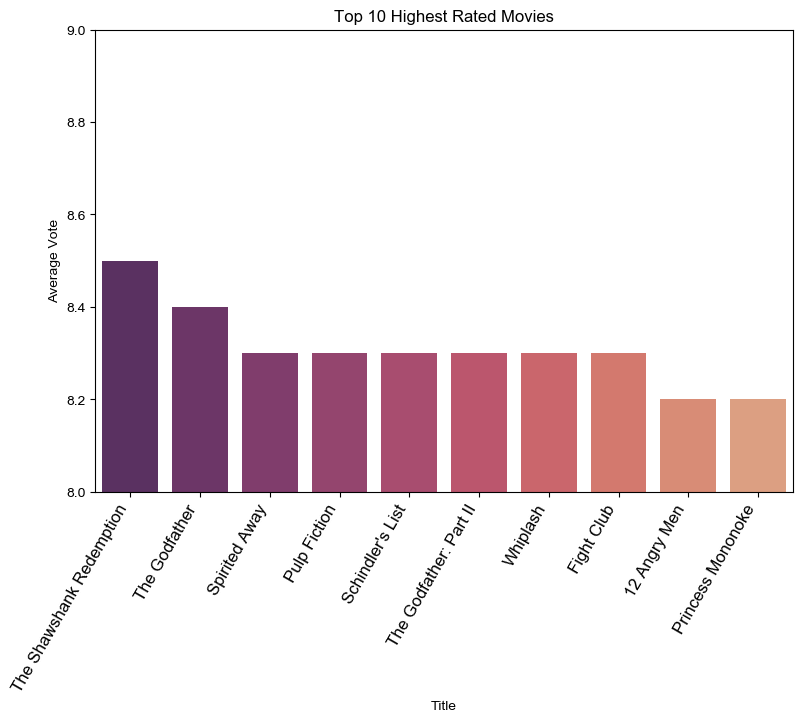

In [444]:
# Creating a bar plot for top 10 movies by the average vote
plt.figure(figsize=(9, 6))
sns.barplot(top10_byavgvote, 
            x='title', 
            y='vote_average', 
            palette='flare_r')
plt.xticks(rotation=60,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )
plt.ylim(8, 9)
plt.xlabel('Title')
plt.ylabel('Average Vote')
plt.title('Top 10 Highest Rated Movies')
plt.show()

<h4>Minions are not even on the list. So why Minions are so popular?</h4>

In [445]:
# Checking the correlations between popularity and other numericals
df.corr(numeric_only=True)['popularity']

budget          0.505414
id              0.031202
popularity      1.000000
revenue         0.644724
runtime         0.225502
vote_average    0.273952
vote_count      0.778130
Name: popularity, dtype: float64

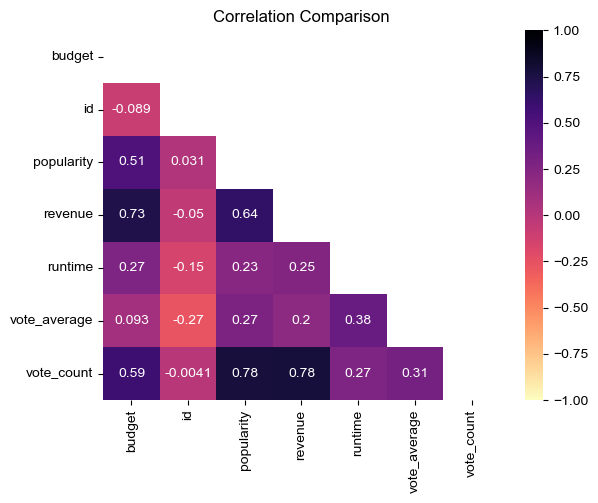

In [464]:
sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           mask = np.triu(df.corr(numeric_only=True)),
           cmap = 'magma_r',
           vmin=-1,
           vmax=1,
           robust=1)
plt.title('Correlation Comparison')
plt.show()

<h4>Vote counts and revenue seems to be the driver of popularity. Not so absurd. Let's start with revenue:</h4>

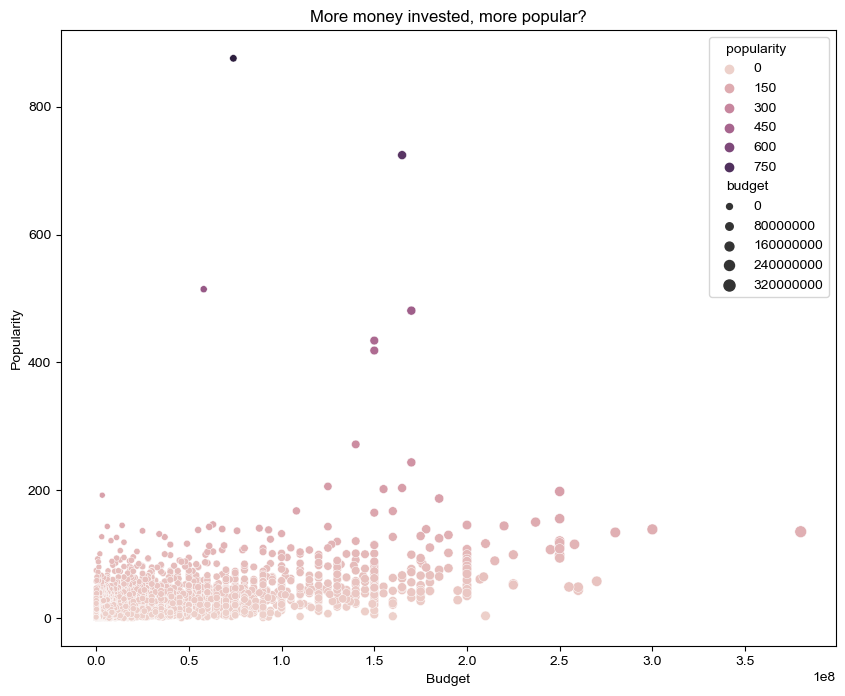

In [448]:
# Creating a scatterplot about budget-popularity
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x=df.budget, y=df.popularity, hue=df.popularity, size=df.budget)
plt.title('More money invested, more popular?')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

<h4>Not exactly... But then why any movie gets many many votes?</h4>

In [449]:
# Ordering values by their vote counts
df.sort_values('vote_count', ascending=False).head(10) 

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_list,keywords_list
96,160000000,27205,en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Inception,8.1,13752,"[Action, Thriller, Science Fiction, Mystery, A...","[loss of lover, dream, kidnapping, sleep, subc..."
65,185000000,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Dark Knight,8.2,12002,"[Drama, Action, Crime, Thriller]","[dc comics, crime fighter, secret identity, sc..."
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
16,220000000,24428,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Avengers,7.4,11776,"[Science Fiction, Action, Adventure]","[new york, shield, marvel comic, superhero, ba..."
788,58000000,293660,en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Deadpool,7.4,10995,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero..."
95,165000000,157336,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Interstellar,8.1,10867,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa..."
287,100000000,68718,en,Django Unchained,"With the help of a German bounty hunter, a fre...",82.121691,2012-12-25,425368238,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Django Unchained,7.8,10099,"[Drama, Western]","[bounty hunter, hero, plantation, society, fri..."
94,170000000,118340,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Guardians of the Galaxy,7.9,9742,"[Action, Science Fiction, Adventure]","[marvel comic, spaceship, space, outer space, ..."
426,75000000,70160,en,The Hunger Games,Every year in the ruins of what was once North...,68.550698,2012-03-12,691210692,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Hunger Games,6.9,9455,"[Science Fiction, Adventure, Fantasy]","[hallucination, dystopia, female protagonist, ..."
127,150000000,76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mad Max: Fury Road,7.2,9427,"[Action, Adventure, Science Fiction, Thriller]","[future, chase, post-apocalyptic, dystopia, au..."


<h4>Can the reason be related to genres?</h4>

In [450]:
# Checking genre-vote count relationship
genre_vote_df = df[['vote_count', 'genres_list']].explode('genres_list')
mean_votes_by_genre = genre_vote_df.groupby('genres_list')['vote_count'].mean().reset_index().sort_values('vote_count', ascending=False)
mean_votes_by_genre.head()

,genres_list,vote_count
1,Adventure,1430.669620
15,Science Fiction,1425.585047
8,Fantasy,1323.983491
2,Animation,1246.170940
0,Action,1135.814558


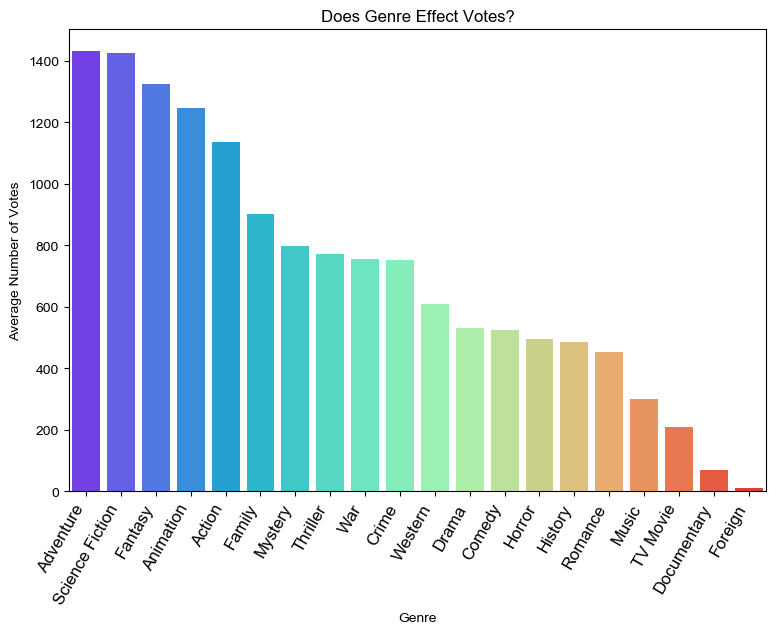

In [451]:
# Creating a graph to visualise genre - vote count relationship
plt.figure(figsize=(9, 6))
sns.barplot(mean_votes_by_genre, 
            x='genres_list', 
            y='vote_count', 
            palette='rainbow')
plt.xticks(rotation=60,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )
plt.xlabel('Genre')
plt.ylabel('Average Number of Votes')
plt.title('Does Genre Effect Votes?')
plt.show()

<h4>Could be. How about keywords?</h4>

In [452]:
# Checking keyword - vote count relationship
keyword_vote_df = df[['vote_count', 'keywords_list']].explode('keywords_list')
mean_votes_by_keyword = keyword_vote_df.groupby('keywords_list')['vote_count'].mean().reset_index().sort_values('vote_count', ascending=False)
mean_votes_by_keyword.head(15)

,keywords_list,vote_count
7755,self healing,10995.0
9804,zero gravity,10867.0
482,astrophysics,10867.0
7243,relativity,10867.0
924,black slave,10099.0
2513,django,10099.0
2662,dual role,10099.0
8291,sponsor,9455.0
3684,glamour,9455.0
5564,mine explosion,9455.0


<h4>Doesn't seem so. Let's check Minions movie again:</h4>

In [453]:
# Retrieving Minions row
df[df['id'] == 211672]

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_list,keywords_list
546,74000000,211672,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits..."


In [ ]:
# Retrieving the keyword values for Minions
df[df['id'] == 211672].keywords_list.values

<h5>Nothing to do with the keywords. There seems to be about the genres though. Adventure and Animation. But the vote_average is 6.4. Even though Minions movie is the most popular, it's not the most 'liked', it's just the most watched. Although there are some explanations -as in genres, there is no direct reasoning for why Minions are this popular, therefore, further analysis is needed.<br> </h5>
<h4>So why The Shawshank Redemption is this highly rated?</h4>

In [454]:
# Checking the correlation between the average vote and the other numericals
df.corr(numeric_only=True)['vote_average']

budget          0.093146
id             -0.270595
popularity      0.273952
revenue         0.197150
runtime         0.375046
vote_average    1.000000
vote_count      0.312997
Name: vote_average, dtype: float64

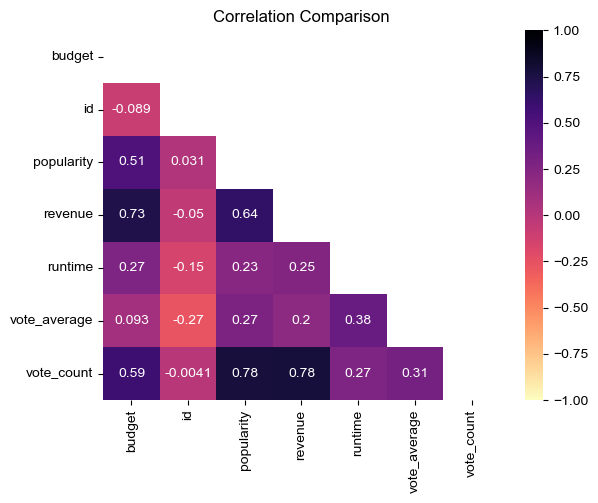

In [465]:
# Remembering the correlation graph
sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           mask = np.triu(df.corr(numeric_only=True)),
           cmap = 'magma_r',
           vmin=-1,
           vmax=1,
           robust=1)
plt.title('Correlation Comparison')
plt.show()

<h4>There seems to be no correlation between average vote and any other numerical. Let's check genre and keywords...</h4>

In [456]:
# Checking genre - average vote relationship
genre_avgvote_df = df[['vote_average', 'genres_list']].explode('genres_list')
mean_avgvotes_by_genre = genre_avgvote_df.groupby('genres_list')['vote_average'].mean().reset_index().sort_values('vote_average', ascending=False)
mean_avgvotes_by_genre.head()

,genres_list,vote_average
10,History,6.719797
18,War,6.713889
6,Drama,6.388594
12,Music,6.355676
9,Foreign,6.352941


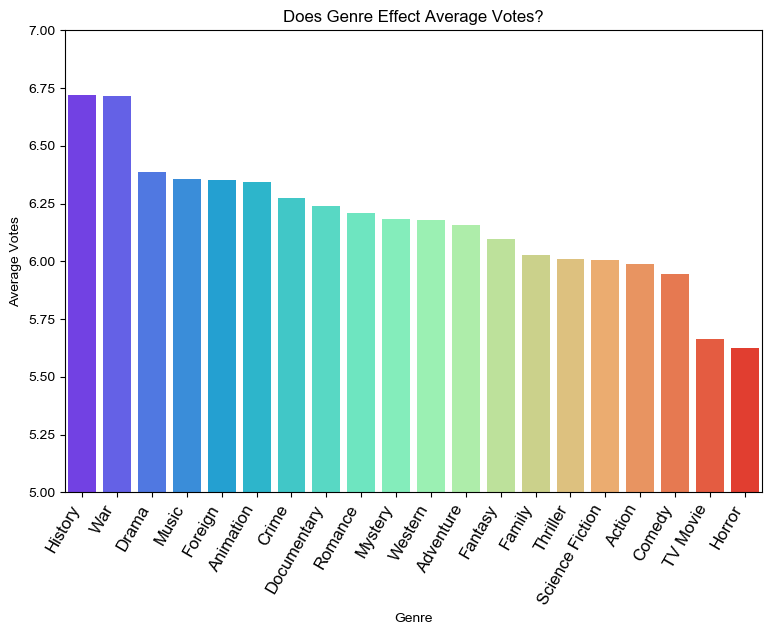

In [466]:
# Creating a graph to visualise genre - average vote relationship
plt.figure(figsize=(9, 6))
sns.barplot(mean_avgvotes_by_genre, 
            x='genres_list', 
            y='vote_average', 
            palette='rainbow',
            )
plt.xticks(rotation=60,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )
plt.ylim(5, 7)
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.title('Does Genre Effect Average Votes?')
plt.show()

<h4>How about any keywords standing out?</h4>

In [458]:
# Checking keyword - average vote relationship
keyword_avgvote_df = df[['vote_average', 'keywords_list']].explode('keywords_list')
mean_avgvotes_by_keyword = keyword_avgvote_df.groupby('keywords_list')['vote_average'].mean().reset_index().sort_values('vote_average', ascending=False)
mean_avgvotes_by_keyword.head(15)

,keywords_list,vote_average
5659,monarch,8.4
4301,identity swap,8.4
769,beautiful princess,8.4
5072,lookalikes,8.4
5635,mob boss,8.4
7011,pulp fiction,8.3
4600,jazz band,8.3
1941,conservatory,8.3
5263,man punches woman,8.3
4005,heirloom,8.3


<h4>Doesn't seem so. Let's check The Shawshank Redemption movie again this time:</h4>

In [459]:
# Retrieving The Shawshank Redemption row
df[df['id'] == 278]

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_list,keywords_list
1881,25000000,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Shawshank Redemption,8.5,8205,"[Drama, Crime]","[prison, corruption, police brutality, prison ..."


In [460]:
# Retrieving the keyword values for The Shawshank Redemption
df[df['id'] == 278].keywords_list.values

array([list(['prison', 'corruption', 'police brutality', 'prison cell', 'delinquent', 'parole board', 'escape from prison', 'wrongful imprisonment', 'framed for murder', '1940s'])],
      dtype=object)

<h5>Not necessarily genres, and not relevant to the keywords at all. Again, further analysis is required <i>but</i> we can at least try to compare Minions and The Shawshank Redemption.</h5>

In [461]:
# Retrieving only two movies for comparison
comparison_df = df[['id', 'budget', 'original_title', 'popularity', 'revenue', 'title', 'vote_average', 'vote_count', 'genres_list', 'keywords_list']].copy()
filtered_df = comparison_df[(comparison_df['id'] == 211672) | (comparison_df['id'] == 278)]
filtered_df

,id,budget,original_title,popularity,revenue,title,vote_average,vote_count,genres_list,keywords_list
546,211672,74000000,Minions,875.581305,1156730962,Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits..."
1881,278,25000000,The Shawshank Redemption,136.747729,28341469,The Shawshank Redemption,8.5,8205,"[Drama, Crime]","[prison, corruption, police brutality, prison ..."


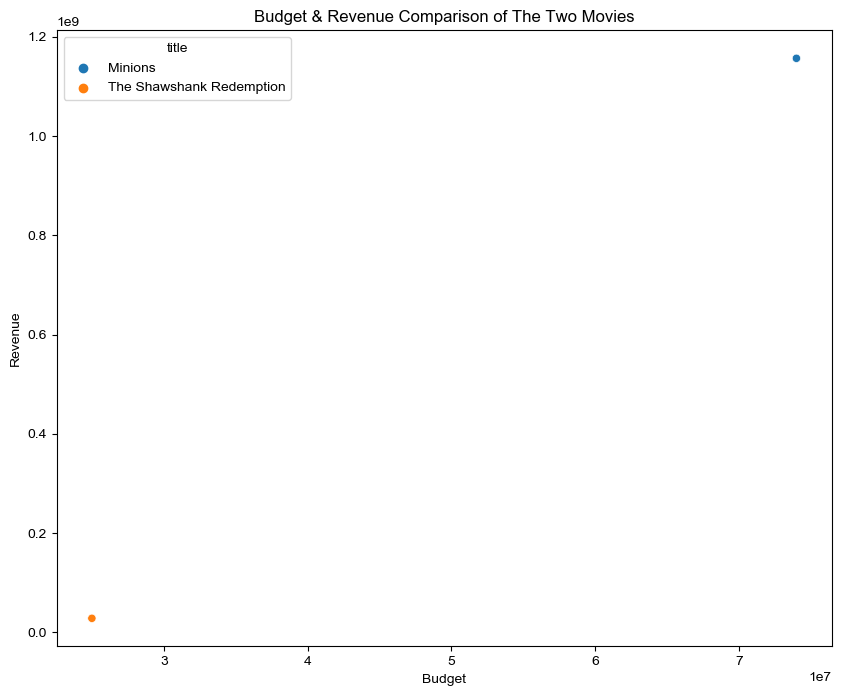

In [462]:
# Creating a scatterplot about budget-popularity
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_df, x='budget', y='revenue', hue='title')
plt.title('Budget & Revenue Comparison of The Two Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

<h4>All in all, dataset needs more detailed analysis to address these intriguing facts.</h4>